In [ ]:
import numpy as np
from keras.layers import (BatchNormalization, Conv2D, MaxPooling2D)
from keras.models import Sequential
from keras.backend import clear_session
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from librosa.feature import melspectrogram
from librosa import power_to_db
import matplotlib.pyplot as plt
!pip install pydub

In [ ]:
import tensorflow_datasets as tfds
gtzan = tfds.load("gtzan")
gtzan = list(gtzan['train'])
audios = []
labels = []
for k in range(len(gtzan)):
  audios.append(gtzan[k]["audio"].numpy().astype(np.float32)/np.iinfo(np.int16).max)
  labels.append(gtzan[k]["label"].numpy().astype(np.float32))

In [ ]:
x = np.zeros([len(audios)*6,128,np.ceil(22050*5/1024).astype(int),1])
y = []
for k in range(len(audios)):
  for i in range(6):
    spect = melspectrogram(y=audios[k][i*22050:(i+5)*22050], sr=22050, n_fft=2048, hop_length=1024)
    x[i+6*k,:,:,0] = power_to_db(spect, ref=np.max)
    y.append(labels[k])

y = to_categorical(y).reshape(6000,1,1,10)

x, y = shuffle(x, y)
x_train = x[:5000]
y_train = y[:5000]
x_test = x[5000:]
y_test = y[5000:]


In [ ]:
clear_session()
model = Sequential()
model.add(Conv2D(4, kernel_size=(4,4), strides=(1,1), input_shape=x.shape[1:], activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(2, kernel_size=(16,16), strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1, kernel_size=(64,64), strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(10, kernel_size=(47,27), strides=(1,1), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 105, 4)       68        
                                                                 
 batch_normalization (BatchN  (None, 125, 105, 4)      16        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 90, 2)        2050      
                                                                 
 batch_normalization_1 (Batc  (None, 110, 90, 2)       8         
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 27, 1)         8193      
                                                                 
 batch_normalization_2 (Batc  (None, 47, 27, 1)        4

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8, batch_size=2048, verbose=1)

Epoch 1/8
3/3 [==============================] - 703s 210s/step - loss: 2.4072 - accuracy: 0.0958 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 2/8
3/3 [==============================] - 695s 209s/step - loss: 2.0813 - accuracy: 0.2230 - val_loss: 2.3070 - val_accuracy: 0.0860
Epoch 3/8
3/3 [==============================] - 683s 203s/step - loss: 2.0372 - accuracy: 0.2318 - val_loss: 2.3070 - val_accuracy: 0.1010
Epoch 4/8
3/3 [==============================] - 681s 203s/step - loss: 1.9915 - accuracy: 0.2524 - val_loss: 2.3162 - val_accuracy: 0.0860
Epoch 5/8
3/3 [==============================] - 685s 205s/step - loss: 1.9408 - accuracy: 0.2636 - val_loss: 2.3298 - val_accuracy: 0.1010
Epoch 6/8
3/3 [==============================] - 678s 202s/step - loss: 1.9064 - accuracy: 0.3162 - val_loss: 2.3425 - val_accuracy: 0.1010
Epoch 7/8
3/3 [==============================] - 679s 202s/step - loss: 1.8911 - accuracy: 0.3316 - val_loss: 2.3494 - val_accuracy: 0.1010
Epoch 8/8
3/3 [=====

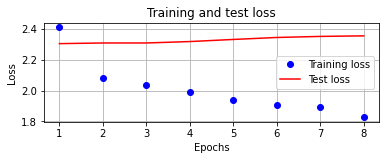

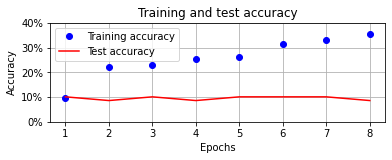

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()